In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import sys
from PIL import Image
from skimage import io
import skimage.transform as trans

## Compile + train

In [5]:
from keras_unet.utils import load_data_Kfold, get_items

mask_path = "input/train/label_test"
org_path = "input/train/im_test"
k = 5

folds, x_train, y_train = load_data_Kfold(org_path,mask_path,k)

In [3]:
from keras.callbacks import ModelCheckpoint
from keras_unet.models import custom_unet
model = custom_unet(
    (512,512,1),
    use_batch_norm=False,
    num_classes=1,
    filters=64,
    dropout=0.2,
    output_activation='sigmoid')
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model_filename = 'segm_model_v0.h5'
callback_checkpoint = ModelCheckpoint(
    model_filename, 
    verbose=1, 
    monitor='val_loss', 
    save_best_only=True,
)

In [ ]:
from keras_unet.utils import get_augmented
from keras.optimizers import Adam, SGD
from keras_unet.models import custom_unet
BATCH_SIZE = 2
for fold_number, (train_idx,val_idx) in enumerate(folds):
    print(f'Training fold {fold_number}')
    x_training = get_items(x_train[train_idx])
    y_training = get_items(y_train[train_idx])
    x_valid = get_items(x_train[val_idx])
    y_valid = get_items(y_train[val_idx])
    input_shape = x_training[0].shape
    
    model.compile(
    optimizer=Adam(lr=0.0001), 
    #optimizer=SGD(lr=0.01, momentum=0.99),
    loss='binary_crossentropy',
    #loss=jaccard_distance,
   # metrics=[iou, iou_thresholded]
    metrics = ['accuracy'])
       
    train_gen = get_augmented(
    x_training, y_training, batch_size=2,
    data_gen_args = dict(
        rotation_range=15.,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=50,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant'
    ))
    #generator = dataGenerator(BATCH_SIZE, x_training,y_training,data_gen_args,seed = 1) 
    history = model.fit_generator(train_gen,steps_per_epoch=len(x_training)/BATCH_SIZE,epochs=10,verbose=1,validation_data = (x_valid,y_valid),callbacks=[callback_checkpoint])
    #history = model.fit_generator(train_gen,steps_per_epoch=2,epochs=3,verbose=1,validation_data = (x_valid,y_valid),callbacks=[callback_checkpoint])

Training fold 0
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
61/60 [==============================] - 973s 16s/step - loss: 0.4659 - acc: 0.5772 - val_loss: 0.4014 - val_acc: 0.6321

Epoch 00001: val_loss improved from inf to 0.40140, saving model to segm_model_v0.h5
Epoch 2/10
61/60 [==============================] - 911s 15s/step - loss: 0.4316 - acc: 0.6259 - val_loss: 0.4053 - val_acc: 0.6318

Epoch 00002: val_loss did not improve from 0.40140
Epoch 3/10
61/60 [==============================] - 918s 15s/step - loss: 0.4363 - acc: 0.6326 - val_loss: 0.4097 - val_acc: 0.6316

Epoch 00003: val_loss did not improve from 0.40140
Epoch 4/10
61/60 [==============================] - 899s 15s/step - loss: 0.4311 - acc: 0.6298 - val_loss: 0.4038 - val_acc: 0.6317

Epoch 00004: val_loss did not improve from 0.40140
Epoch 5/10
61/60 [==============================] - 940s 15s/step - loss: 0.4246 - acc: 0.6276 - val_loss: 0.4265 - val_acc: 0.6315

Epoch 00005: val_loss did not imp

In [4]:
import mlflow.projects

ModuleNotFoundError: No module named 'mlflow.projects'

In [18]:
print(history.history['val_loss'])

[0.4537702719370524, 1.330309303601583, 0.4696525573730469]


## Plot training history

In [ ]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

## Plot original + ground truth + pred + overlay (pred on top of original)

In [1]:
model.load_weights(model_filename)
y_pred = model.predict(x_valid)

NameError: name 'model' is not defined

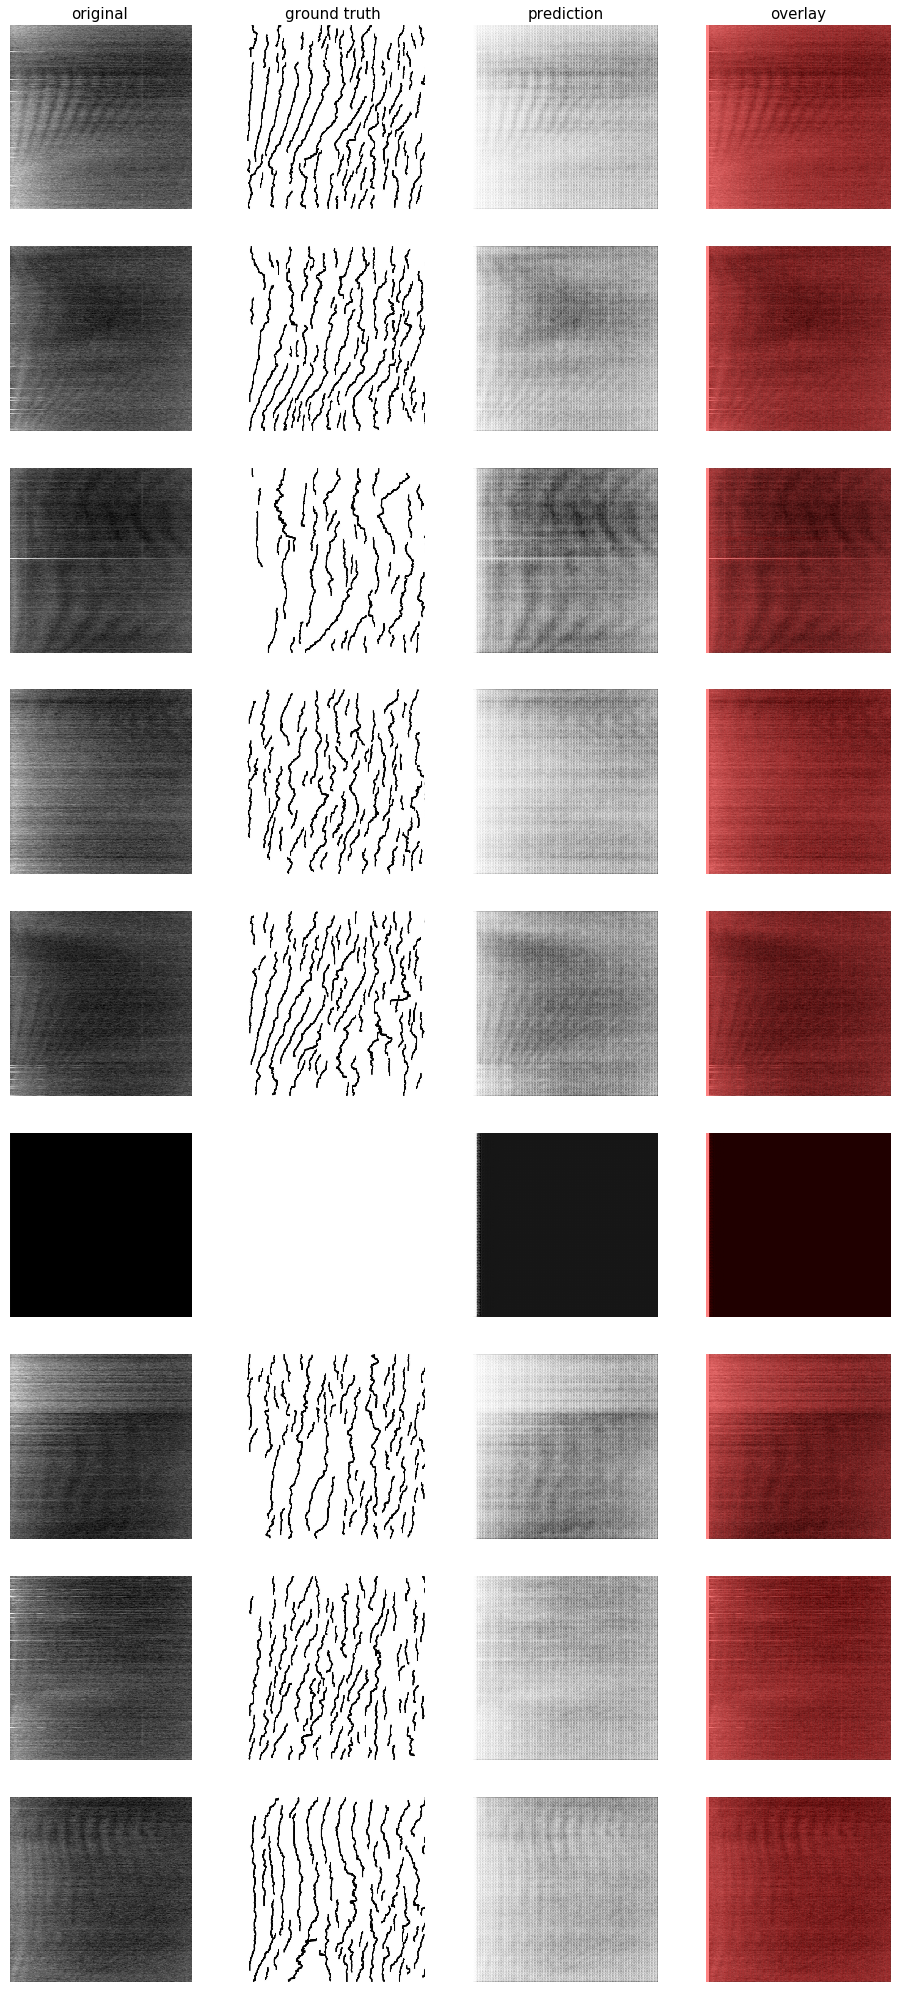

In [14]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=x_valid, mask_imgs=y_valid, pred_imgs=y_pred, nm_img_to_plot=9)